In [16]:
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [19]:
# TOP 5 ZIP CODES
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [22]:
# TOP 5 TOWNSHIPS (TWP)
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [24]:
# unique title codes in TITLE COLUMN
len(df['title'].unique())

110

In [26]:
x = df['title'].iloc[0]

In [37]:
x.split(':')[0]

'EMS'

In [31]:
# reasons column
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [32]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [33]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [38]:
df['type'] = df['title'].apply(lambda title: title.split(':')[1])

In [48]:
df['type'].value_counts().head(10)

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
 FALL VICTIM               4863
 ROAD OBSTRUCTION -        3144
 SUBJECT IN PAIN           2687
 HEAD INJURY               2631
Name: type, dtype: int64

In [50]:
# 911 calls by Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

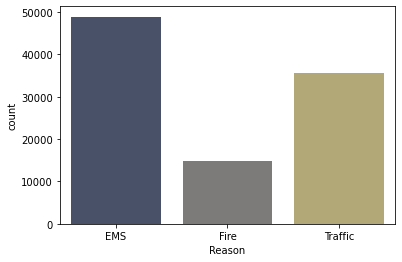

In [115]:
sns.countplot(x='Reason', data=df, palette='cividis')

In [116]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [117]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [118]:
type(df['timeStamp'].iloc[0])

#now it is a date time object

pandas._libs.tslibs.timestamps.Timestamp

In [119]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [120]:
time.hour

17

In [121]:
df['year']= df['timeStamp'].apply(lambda time: time.year)
df['month']= df['timeStamp'].apply(lambda time: time.month)
df['day of week']= df['timeStamp'].apply(lambda time: time.day_of_week)
df['hour']= df['timeStamp'].apply(lambda time: time.hour)

In [122]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,type,year,month,day of week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,12,3,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,12,3,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,12,3,17


In [123]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [124]:
df['day of week'] = df['day of week'].map(dmap)

In [125]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,type,year,month,day of week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,12,Thu,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,12,Thu,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,12,Thu,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,12,Thu,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,12,Thu,17


In [126]:
mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' }

In [129]:
df['month'] = df['month'].map(mmap)

In [130]:
df['month'] 

0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
99487    Aug
99488    Aug
99489    Aug
99490    Aug
99491    Aug
Name: month, Length: 99492, dtype: object

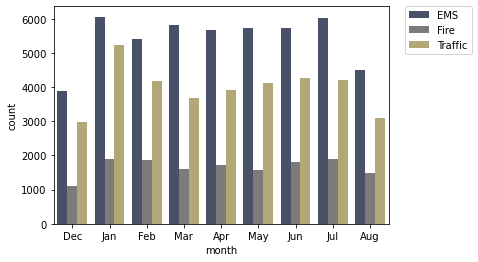

In [131]:
sns.countplot(x='month', data=df,hue='Reason', palette='cividis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [135]:
# It is missing some months! 9,10, and 11 are not there.

In [133]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,type,year,day of week,hour
month,,,,,,,,,,,,,,
Apr,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
Aug,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
Dec,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969
Feb,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
Jan,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205


<AxesSubplot:xlabel='month'>

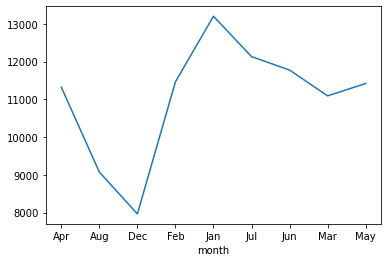

In [134]:
# Could be any column
byMonth['twp'].plot()

In [147]:
dayHour = df.groupby(by=['month','hour']).count()['Reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
Apr,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
Aug,219,182,166,135,131,144,188,326,466,465,...,552,612,656,564,476,419,373,345,245,247
Dec,150,131,126,118,105,135,184,268,342,373,...,488,455,508,622,573,419,361,305,286,204
Feb,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
Jan,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345


<AxesSubplot:xlabel='hour', ylabel='month'>

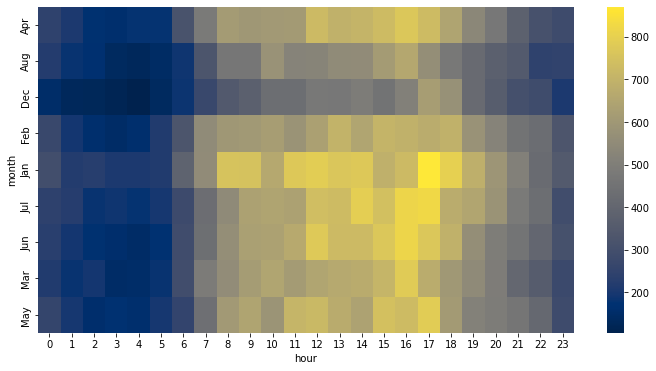

In [148]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='cividis')

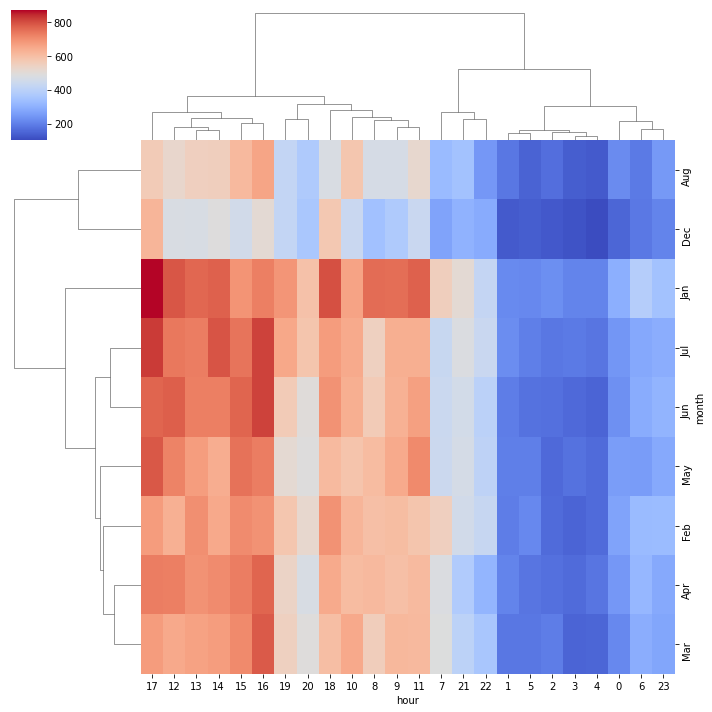

In [150]:
sns.clustermap(dayHour,cmap='coolwarm')